In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from ls.config.loader import load_config

In [3]:
# load config
cfg = load_config("../configs/config.yaml")

print("Dataset config:", cfg.dataset)
print("Audio config:", cfg.audio)

Dataset config: {'name': 'icbhi', 'data_folder': '/home/AIoT04/Datasets/icbhi_dataset', 'cycle_metadata_path': '/home/AIoT04/Datasets/icbhi_dataset/icbhi_metadata.csv', 'class_split': 'lungsound', 'split_strategy': 'official', 'test_fold': 0, 'multi_label': True, 'n_cls': 4, 'weighted_sampler': True, 'batch_size': 16, 'num_workers': 2, 'h': 128, 'w': 1024}
Audio config: {'sample_rate': 16000, 'desired_length': 10.0, 'remove_dc': True, 'normalize': False, 'pad_type': 'repeat', 'use_fade': True, 'fade_samples_ratio': 64, 'n_mels': 128, 'frame_length': 40, 'frame_shift': 10, 'low_freq': 100, 'high_freq': 8000, 'window_type': 'hanning', 'use_energy': False, 'dither': 0.0, 'mel_norm': 'mit', 'resz': 1.0, 'raw_augment': 1, 'wave_aug': [{'type': 'Crop', 'sampling_rate': 16000, 'zone': [0.0, 1.0], 'coverage': 1.0, 'p': 0.0}, {'type': 'Noise', 'color': 'white', 'p': 0.1}, {'type': 'Speed', 'factor': [0.9, 1.1], 'p': 0.1}, {'type': 'Loudness', 'factor': [0.5, 2.0], 'p': 0.1}, {'type': 'VTLP', 's

In [4]:
cfg.dataset

Box({'name': 'icbhi', 'data_folder': '/home/AIoT04/Datasets/icbhi_dataset', 'cycle_metadata_path': '/home/AIoT04/Datasets/icbhi_dataset/icbhi_metadata.csv', 'class_split': 'lungsound', 'split_strategy': 'official', 'test_fold': 0, 'multi_label': True, 'n_cls': 4, 'weighted_sampler': True, 'batch_size': 16, 'num_workers': 2, 'h': 128, 'w': 1024})

In [5]:
from ls.data.icbhi import ICBHIDataset

In [6]:
# test_df = pd.read_csv(cfg.dataset.cycle_metadata_path)
# test_df.isna().sum()    

In [7]:
# Instantiate datasets
train_ds = ICBHIDataset(
    cfg.dataset,
    cfg.audio,
    train=True,
    transform=None,
    mean_std=False,
    print_info=True
)
print(train_ds)


[ICBHI] Imputation values:
  Age median: 68.0
  BMI median: 27.4
[ICBHI] Loaded cycle metadata: 6898 rows
[ICBHI] Sites: 7 - {'Al': 0, 'Ar': 1, 'Ll': 2, 'Lr': 3, 'Pl': 4, 'Pr': 5, 'Tc': 6}
[ICBHI] Devices: 4 - {'AKGC417L': 0, 'Litt3200': 1, 'LittC2SE': 2, 'Meditron': 3}


/storage/data/iotlab/AIoT/konto/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/storage/data/iotlab/AIoT/konto/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https:/

[ICBHI] Extracted 4142 cycles from 539 recordings

[ICBHI] Validating dataset...
Dataset validation passed - no NaN/Inf in continuous features

[ICBHI] Dataset: TRAIN
Input spectrogram shape: (997, 128, 1)
Total cycles: 4142

Multi-label distribution:
  Normal (00): 2063 (49.8%)
  Crackle (10): 1215 (29.3%)
  Wheeze (01): 501 (12.1%)
  Both (11): 363 (8.8%)

Continuous feature statistics:
  age: mean=63.27, std=22.63
  bmi: mean=24.89, std=6.76
  duration: mean=2.74, std=1.21

ICBHIDataset(train=True, n_samples=4142, input_shape=(997, 128), n_wave_augs=4, n_spec_augs=1)


In [9]:
test_ds = ICBHIDataset(
    cfg.dataset, cfg.audio, 
    train=False, 
    transform=None, 
    mean_std=False, 
    print_info=True,
    continuous_stats=train_ds.continuous_stats
)
print(test_ds)


[ICBHI] Imputation values:
  Age median: 68.0
  BMI median: 27.4
[ICBHI] Loaded cycle metadata: 6898 rows
[ICBHI] Sites: 7 - {'Al': 0, 'Ar': 1, 'Ll': 2, 'Lr': 3, 'Pl': 4, 'Pr': 5, 'Tc': 6}
[ICBHI] Devices: 4 - {'AKGC417L': 0, 'Litt3200': 1, 'LittC2SE': 2, 'Meditron': 3}


/storage/data/iotlab/AIoT/konto/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/storage/data/iotlab/AIoT/konto/envs/icbhi-ast/lib/python3.11/site-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https:/

[ICBHI] Extracted 2756 cycles from 381 recordings

[ICBHI] Validating dataset...
Dataset validation passed - no NaN/Inf in continuous features

[ICBHI] Dataset: TEST
Input spectrogram shape: (997, 128, 1)
Total cycles: 2756

Multi-label distribution:
  Normal (00): 1579 (57.3%)
  Crackle (10): 649 (23.5%)
  Wheeze (01): 385 (14.0%)
  Both (11): 143 (5.2%)

Continuous feature statistics:
  age: mean=63.27, std=22.63
  bmi: mean=24.89, std=6.76
  duration: mean=2.74, std=1.21

ICBHIDataset(train=False, n_samples=2756, input_shape=(997, 128), n_wave_augs=0, n_spec_augs=0)


In [10]:
print(len(train_ds) + len(test_ds))

6898


In [11]:
check_devices = set()
for s in test_ds:
    check_devices.add(s["device_id"].item())
print("Test devices:", check_devices)

Test devices: {0, 1, 3}


In [12]:
for s in train_ds:
    print(s)
    break

{'input_values': tensor([[[-0.1539, -0.2201, -0.3603,  ..., -0.3431, -0.3735, -0.2569],
         [-0.2648, -0.3010, -0.5088,  ..., -0.4080, -0.5410, -0.4685],
         [-0.4321, -0.4102, -0.5502,  ..., -0.3179, -0.5457, -0.4979],
         ...,
         [-0.5058, -0.4474, -0.4886,  ..., -0.4883, -0.4369, -0.4215],
         [-0.5116, -0.4897, -0.4617,  ..., -0.5109, -0.4326, -0.4274],
         [-0.4493, -0.4990, -0.4386,  ..., -0.4816, -0.4115, -0.4615]]]), 'audio': tensor([[0.1117, 0.1118, 0.1124,  ..., 0.9998, 0.9998, 0.9998]]), 'filename': '103_2b2_Ar_mc_LittC2SE', 'cycle_index': 0, 'pid': '103', 'duration': 2.886, 'start_time': 0.364, 'end_time': 3.25, 'site': 'Ar', 'device': 'LittC2SE', 'site_id': tensor(1), 'device_id': tensor(2), 'age': tensor(70.), 'bmi': tensor(33.), 'm_rest': tensor([0.2975, 1.1996, 0.1230]), 'label': tensor([0., 1.])}


In [13]:
idx = np.random.randint(len(train_ds))
sample = train_ds[1281]

mel_spec = sample["input_values"]
print(mel_spec.shape)

torch.Size([1, 128, 997])


In [14]:
import IPython.display as ipd

297
Keys: dict_keys(['input_values', 'audio', 'filename', 'cycle_index', 'pid', 'duration', 'start_time', 'end_time', 'site', 'device', 'site_id', 'device_id', 'age', 'bmi', 'm_rest', 'label'])
Filename: 110_1p1_Ll_sc_Meditron
Cycle index: 4
Label: tensor([0., 1.])
Duration: 4.177
Start-End: 19.678 - 23.855
Crackle/Wheeze: tensor(0.) tensor(1.)
Auscultation site: Ll, device: Meditron
Waveform shape: torch.Size([1, 160000])
Mel image shape: torch.Size([1, 128, 997])


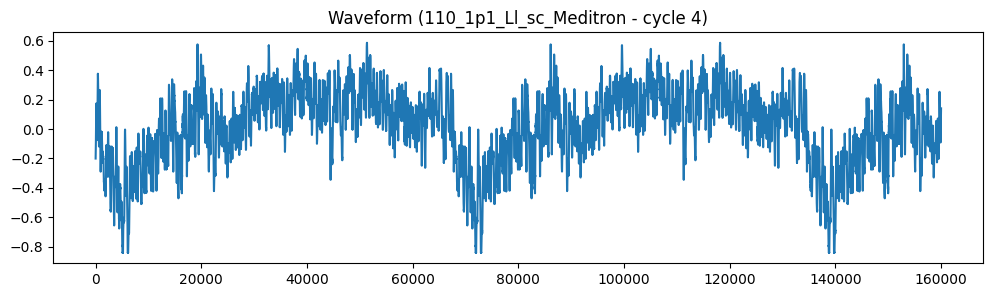

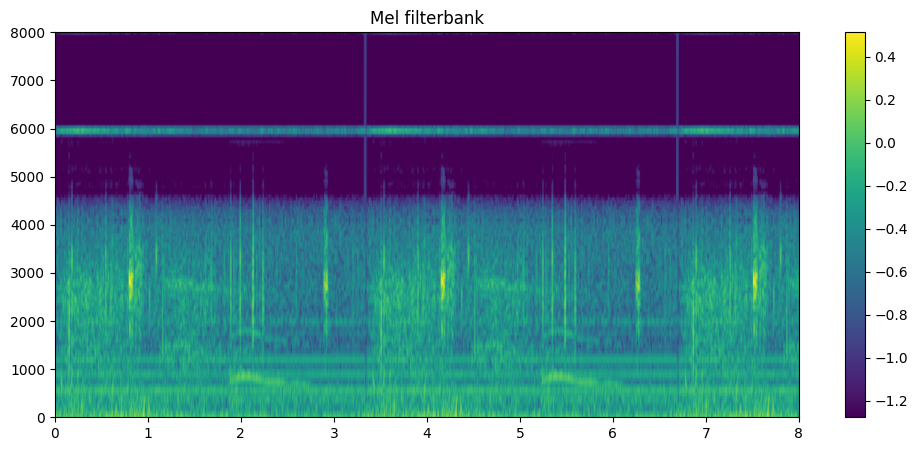

In [16]:
# Inspect one sample
idx = np.random.randint(len(train_ds))
# sample = train_ds[1281]
sample = train_ds[idx]
print(idx)
print("Keys:", sample.keys())
print("Filename:", sample["filename"])
print("Cycle index:", sample["cycle_index"])
print("Label:", sample["label"])
print("Duration:", sample["duration"])
print("Start-End:", sample["start_time"], "-", sample["end_time"])
print("Crackle/Wheeze:", sample["label"][0], sample["label"][1])
# print(sample["aug_audio"].shape, sample["aug_fbank"].shape, sample["audio"].shape, sample["fbank"].shape)
print(f"Auscultation site: {sample['site']}, device: {sample['device']}")
print("Waveform shape:", sample["audio"].shape)
print("Mel image shape:", sample["input_values"].shape)

def tensors_equal(a, b, atol=1e-6, rtol=1e-5):
    return torch.allclose(a, b, atol=atol, rtol=rtol)

# print(sample['fbank'].shape, sample['aug_fbank'].shape)
# print(f"Waveform augmented: {not tensors_equal(sample['audio'].view(-1), sample['aug_audio'].view(-1))}")
# print(f"Mel augmented: {not tensors_equal(sample['fbank'].view(-1), sample['aug_fbank'].view(-1))}")

# Plot waveform
waveform = sample["audio"].squeeze().numpy()
plt.figure(figsize=(12, 3))
plt.plot(waveform)
plt.title(f"Waveform ({sample['filename']} - cycle {sample['cycle_index']})")
plt.show()

# Plot mel spectrogram
mel = sample["input_values"].squeeze(0) # .T  # [time, freq] for imshow
plt.figure(figsize=(12, 5))
plt.imshow(mel, origin="lower", aspect="auto", extent=[0, 8, 0, 8000], cmap="viridis")
plt.title("Mel filterbank")
plt.colorbar()
plt.show()

ipd.Audio(waveform, rate=cfg.audio.sample_rate)  # listen to the sound

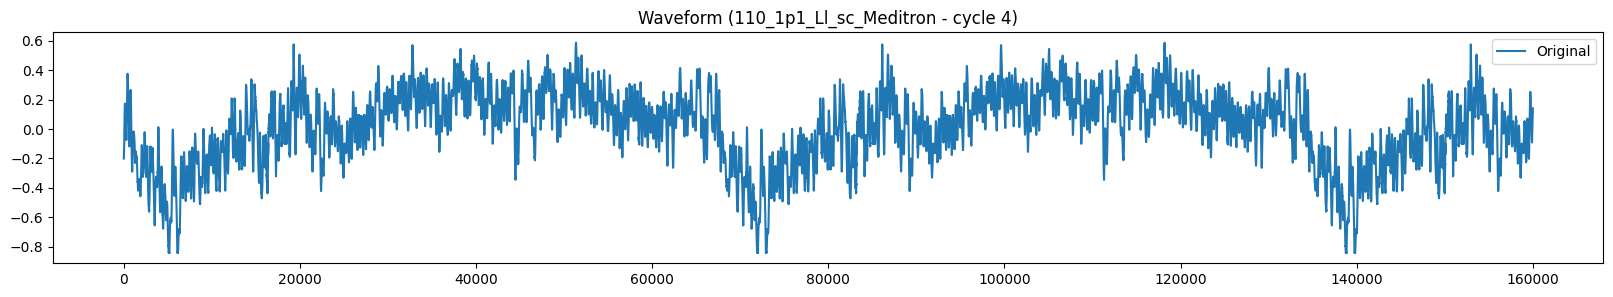

In [17]:
orig_padded_audio = sample["audio"].squeeze().numpy()
# aug_padded_audio = sample["aug_audio"].squeeze().numpy()

plt.figure(figsize=(20, 3))
plt.plot(orig_padded_audio[:int(10*cfg.audio.sample_rate)], label="Original")
# plt.plot(aug_padded_audio[:int(10*cfg.audio.sample_rate)], label="Augmented", alpha=0.7)
plt.title(f"Waveform ({sample['filename']} - cycle {sample['cycle_index']})")
plt.legend()
plt.show()

ipd.display(ipd.Audio(orig_padded_audio, rate=cfg.audio.sample_rate))
# ipd.display(ipd.Audio(aug_padded_audio, rate=cfg.audio.sample_rate))